#Carico il Dataset e le librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot.head()
tabella_tot.columns


Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')

#Modelli - Comp1

In [2]:
tabella_tot=pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_1=tabella_tot

<ipython-input-3-1d9c395a1e87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


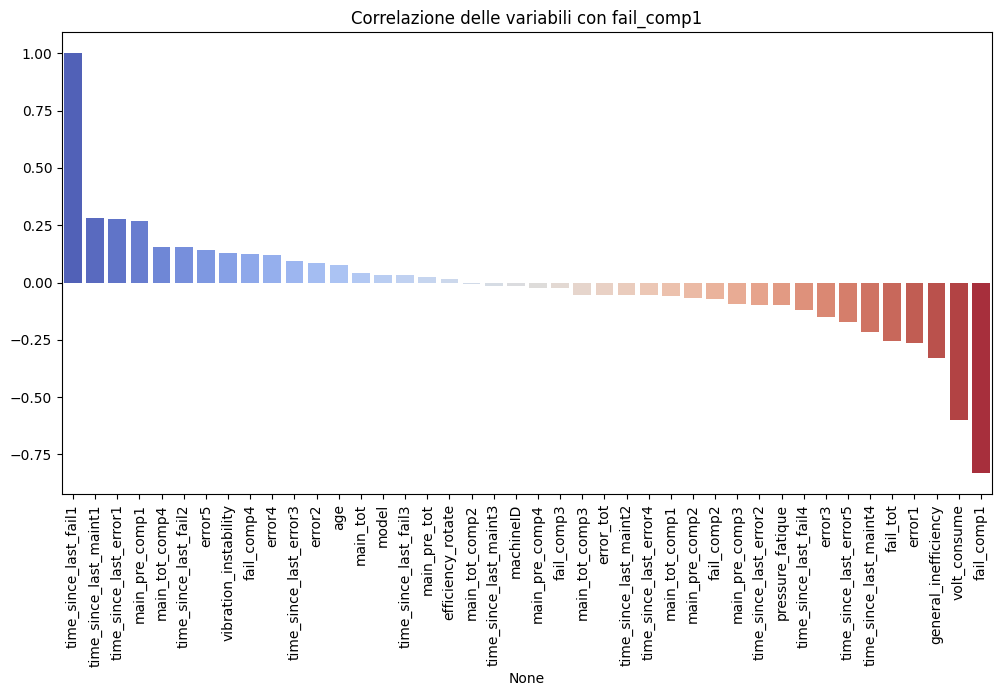

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [3]:
# Correlazione con la variabile target
target_corr = tabella_tot_1.corr()["time_since_last_fail1"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp1")
plt.show()
print(tabella_tot.columns)

In [45]:
tabella_tot_1 = tabella_tot_1[['efficiency_rotate', 'volt_consume','general_inefficiency',\
                               'pressure_fatique', 'vibration_instability','fail_comp1',\
                               'error1','fail_tot','age', 'model','main_pre_comp1',\
                               'main_pre_tot','time_since_last_fail1']].copy()
tabella_tot_1["fail1_inefficiency"] = tabella_tot_1["fail_comp1"]/tabella_tot_1["general_inefficiency"]
tabella_tot_1["volt_inefficiency"] = tabella_tot_1["volt_consume"]/tabella_tot_1["general_inefficiency"]
tabella_tot_1["error1_fail1"] = tabella_tot_1["error1"]/tabella_tot_1["fail_comp1"]
tabella_tot_1["main_pre_fail"] = tabella_tot_1["main_pre_comp1"]/tabella_tot_1["fail_comp1"] + 0.000001
tabella_tot_1["error1_fail1"] = tabella_tot_1["error1"]/tabella_tot_1["fail_comp1"]
tabella_tot_1["high_vibration"] = (tabella_tot_1["vibration_instability"] > tabella_tot_1["vibration_instability"].median()).astype(int)
tabella_tot_1["volt_time_fail1"] = tabella_tot_1["volt_consume"]*tabella_tot_1["fail_comp1"]
tabella_tot_1["inefficency_time_fail1"] = tabella_tot_1["general_inefficiency"]*tabella_tot_1["fail_comp1"]
tabella_tot_1["fail_tot_per_inefficiency"] = tabella_tot_1["fail_tot"] / (tabella_tot_1["general_inefficiency"] + 1)
tabella_tot_1["fail_tot_per_volt"] = tabella_tot_1["fail_tot"] / (tabella_tot_1["volt_consume"] + 1)
tabella_tot_1["error1_x_main_pre_comp1"] = tabella_tot_1["error1"] * tabella_tot_1["main_pre_comp1"]
tabella_tot_1["volt_x_inefficiency"] = tabella_tot_1["volt_consume"] * tabella_tot_1["general_inefficiency"]

# Trasformazioni logaritmiche (evitando log(0) con log1p)
tabella_tot_1["log_fail_tot"] = np.log1p(tabella_tot_1["fail_tot"])
tabella_tot_1["log_inefficiency"] = np.log1p(tabella_tot_1["general_inefficiency"])
tabella_tot_1["model_x_fail_tot"] = tabella_tot_1["model"] * tabella_tot_1["fail_tot"]
tabella_tot_1["model_x_volt"] = tabella_tot_1["model"] * tabella_tot_1["volt_consume"]
tabella_tot_1["model_x_age"] = tabella_tot_1["model"] * tabella_tot_1["age"]

# Mostra le prime righe per verifica
print(tabella_tot_1.head())

tabella_tot_1.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_1.fillna(0, inplace=True)
tabella_tot_1.head()


   efficiency_rotate  volt_consume  general_inefficiency  pressure_fatique  \
0           0.642191      0.669609              0.602641          0.541367   
1           0.642267      0.669322              0.601702          0.540677   
2           0.642546      0.668925              0.602060          0.541285   
3           0.641785      0.668927              0.601642          0.540838   
4           0.642943      0.670435              0.603195          0.543507   

   vibration_instability  fail_comp1  error1  fail_tot  age  model  ...  \
0               0.528529           1      11         7   18      3  ...   
1               0.524821           1       5         4    7      4  ...   
2               0.527084           1      11         5    8      3  ...   
3               0.525343           2      10         6    7      3  ...   
4               0.524343           4      14         7    2      3  ...   

   inefficency_time_fail1  fail_tot_per_inefficiency  fail_tot_per_volt  \
0    

,efficiency_rotate,volt_consume,general_inefficiency,pressure_fatique,vibration_instability,fail_comp1,error1,fail_tot,age,model,...,inefficency_time_fail1,fail_tot_per_inefficiency,fail_tot_per_volt,error1_x_main_pre_comp1,volt_x_inefficiency,log_fail_tot,log_inefficiency,model_x_fail_tot,model_x_volt,model_x_age
0,0.642191,0.669609,0.602641,0.541367,0.528529,1,11,7,18,3,...,0.602641,4.367790,4.192597,99,0.403534,2.079442,0.471653,21,2.008828,54
1,0.642267,0.669322,0.601702,0.540677,0.524821,1,5,4,7,4,...,0.601702,2.497344,2.396183,25,0.402732,1.609438,0.471067,16,2.677286,28
2,0.642546,0.668925,0.602060,0.541285,0.527084,1,11,5,8,3,...,0.602060,3.120981,2.995941,77,0.402733,1.791759,0.471291,15,2.006774,24
3,0.641785,0.668927,0.601642,0.540838,0.525343,2,10,6,7,3,...,1.203285,3.746154,3.595125,50,0.402455,1.945910,0.471030,18,2.006780,21
4,0.642943,0.670435,0.603195,0.543507,0.524343,4,14,7,2,3,...,2.412782,4.366280,4.190526,42,0.404403,2.079442,0.471999,21,2.011304,6


In [46]:
X = tabella_tot_1.drop('time_since_last_fail1',axis='columns')
y = tabella_tot_1['time_since_last_fail1']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


*** Random Forest ***
MAE = 26.181151398909716
MAPE = 0.12022870157357037
MSE = 28129.327293640323
R2 = 0.8220954297947118


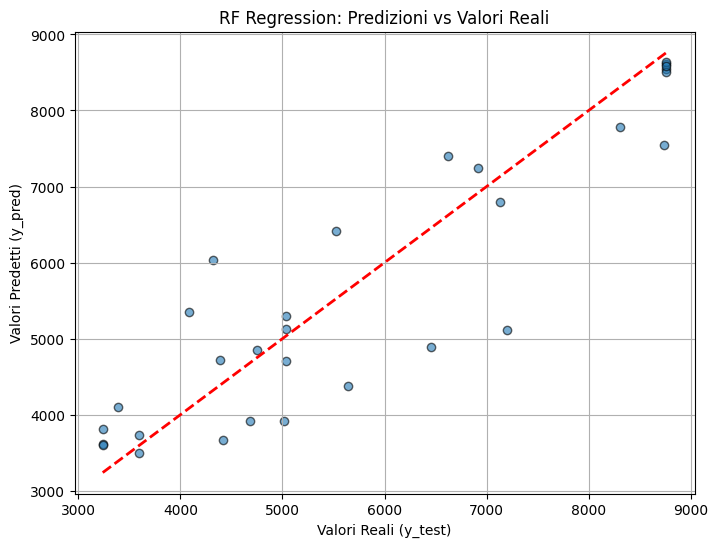

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("*** Random Forest ***")
clf = RandomForestRegressor(n_estimators=600, max_depth=10,\
                            min_samples_split=5,\
                            random_state=42,\
                            n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("RF Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** XGBoost Regression ***
MAE = 32.880531311035156
MAPE = 0.15260161459445953
MSE = 49716.166666666664
R2 = 0.6855689287185669


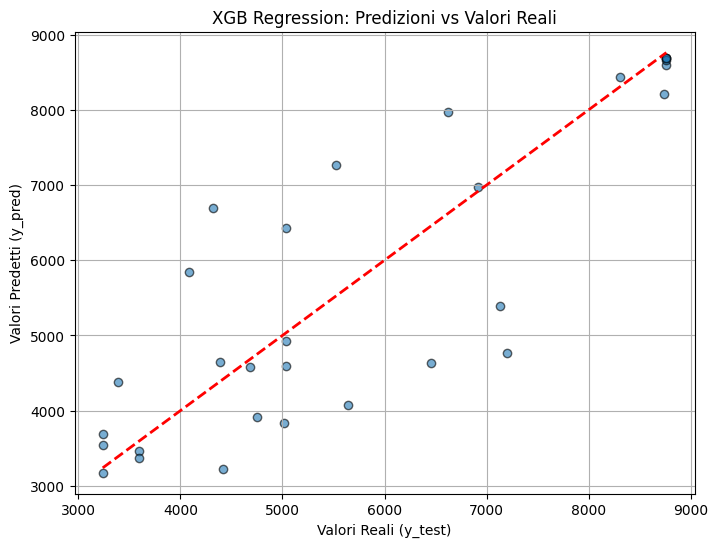

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("*** XGBoost Regression ***")
clf = xgb.XGBRegressor(objective="reg:squarederror",\
                       n_estimators=500,
                       learning_rate=0.1,
                       random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("XGB Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** Linear Regression ***
MAE = 38.710803275638156
MAPE = 0.1803692084978814
MSE = 51137.71381009856
R2 = 0.6765783659986967


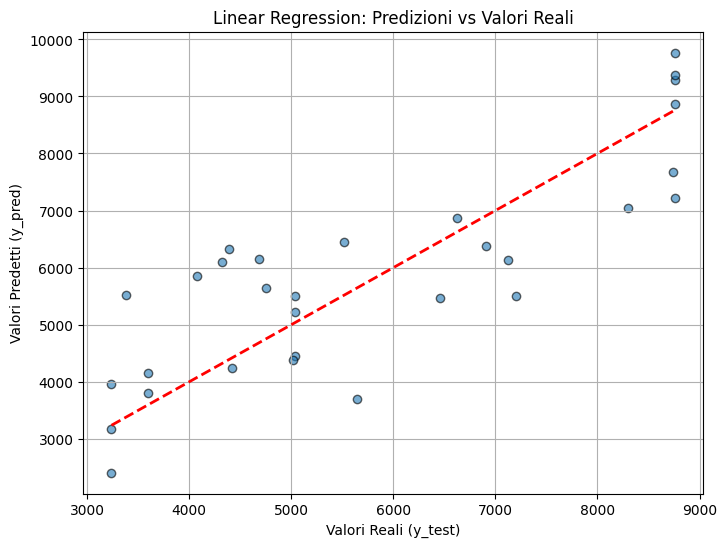

In [50]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")


clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', mean_absolute_error(y_test, y_pred)/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred)/24))
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 1
MAE: 64.1542
MAPE: 27.6529%
MSE: 157808.3569
R2: 0.0019


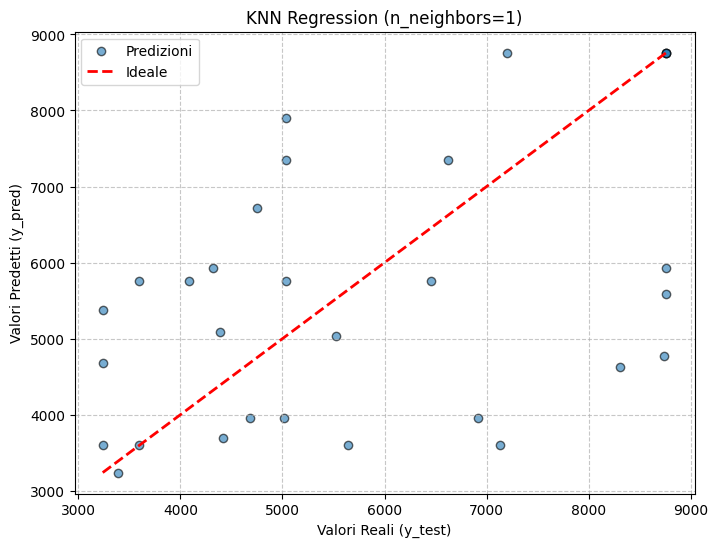

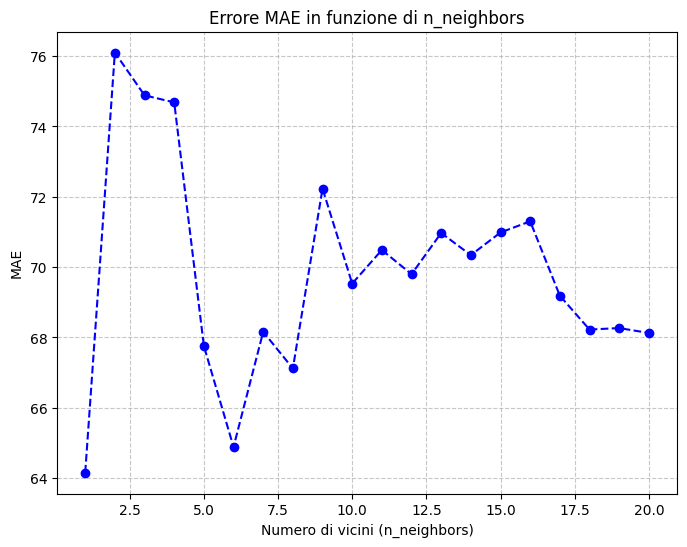

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = (mean_squared_error(y_test, y_pred))/24
r2 = r2_score(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Modelli - Comp2

In [11]:
tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_2 = tabella_tot
tabella_tot_2.head()

,machineID,error1,error2,error3,error4,error5,error_tot,fail_comp1,fail_comp2,fail_comp3,...,time_since_last_error1,time_since_last_error2,time_since_last_error3,time_since_last_error4,time_since_last_error5,efficiency_rotate,volt_consume,general_inefficiency,pressure_fatique,vibration_instability
0,1,11,6,9,5,4,35,1,2,0,...,2173,3161,2529,5399,3959,0.642191,0.669609,0.602641,0.541367,0.528529
1,2,5,10,5,5,3,28,1,3,0,...,3620,2290,4934,3883,3590,0.642267,0.669322,0.601702,0.540677,0.524821
2,3,11,10,8,8,2,39,1,4,0,...,3408,2169,2444,2511,6548,0.642546,0.668925,0.602060,0.541285,0.527084
3,4,10,11,8,2,0,31,2,4,0,...,3471,1920,2519,4979,8761,0.641785,0.668927,0.601642,0.540838,0.525343
4,5,14,8,7,6,3,38,4,3,0,...,1257,2221,2595,3146,3675,0.642943,0.670435,0.603195,0.543507,0.524343


<ipython-input-12-5163cfeeaec6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


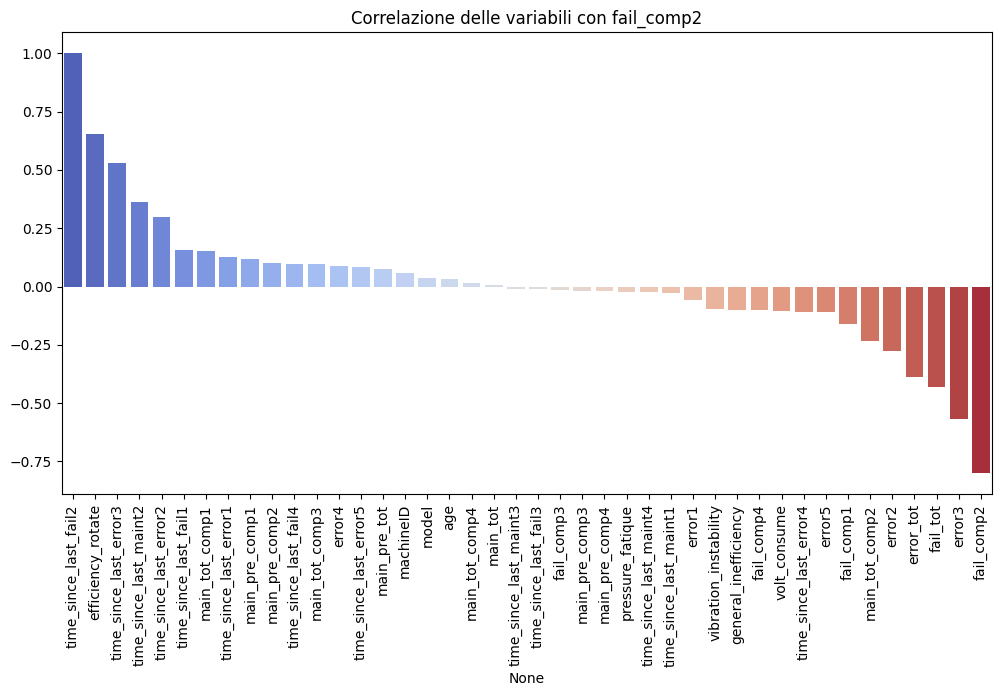

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [12]:
# Correlazione con la variabile target
target_corr = tabella_tot_2.corr()["time_since_last_fail2"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp2")
plt.show()
print(tabella_tot.columns)

In [52]:
tabella_tot_2 = tabella_tot_2[['volt_consume','efficiency_rotate',\
                               'pressure_fatique', 'vibration_instability','fail_comp2',\
                               'error3','fail_tot','age', 'model','main_pre_comp2',\
                               'main_pre_tot','time_since_last_fail2','error_tot']]
tabella_tot_2["fail2_efficiency"] = tabella_tot_2["fail_comp2"]/tabella_tot_2["efficiency_rotate"]
tabella_tot_2["volt_efficiency"] = tabella_tot_2["volt_consume"]/tabella_tot_2["efficiency_rotate"]
tabella_tot_2["error3_fail2"] = tabella_tot_2["error3"]/tabella_tot_2["fail_comp2"]
tabella_tot_2["main_pre_fai2"] = tabella_tot_2["main_pre_comp2"]/tabella_tot_2["fail_comp2"] + 0.000001
tabella_tot_2["error3_fail2"] = tabella_tot_2["error3"]/tabella_tot_2["fail_comp2"]
tabella_tot_2["high_vibration"] = (tabella_tot_2["vibration_instability"] > tabella_tot_2["vibration_instability"].median()).astype(int)
tabella_tot_2["volt_time_fail2"] = tabella_tot_2["volt_consume"]*tabella_tot_2["fail_comp2"]
tabella_tot_2["efficency_time_fail1"] = tabella_tot_2["efficiency_rotate"]*tabella_tot_2["fail_comp2"]
tabella_tot_2["fail_tot_per_inefficiency"] = tabella_tot_2["fail_tot"] / (tabella_tot_2["efficiency_rotate"] + 1)
tabella_tot_2["fail_tot_per_volt"] = tabella_tot_2["fail_tot"] / (tabella_tot_2["volt_consume"] + 1)
tabella_tot_2["error3_x_main_pre_comp2"] = tabella_tot_2["error3"] * tabella_tot_2["main_pre_comp2"]
tabella_tot_2["volt_x_efficiency"] = tabella_tot_2["volt_consume"] * tabella_tot_2["efficiency_rotate"]

# Trasformazioni logaritmiche (evitando log(0) con log1p)
tabella_tot_2["log_fail_tot"] = np.log1p(tabella_tot_2["fail_tot"])
tabella_tot_2["log_efficiency"] = np.log1p(tabella_tot_2["efficiency_rotate"])
tabella_tot_2["model_x_fail_tot"] = tabella_tot_2["model"] * tabella_tot_2["fail_tot"]
tabella_tot_2["model_x_volt"] = tabella_tot_2["model"] * tabella_tot_2["volt_consume"]
tabella_tot_2["model_x_age"] = tabella_tot_2["model"] * tabella_tot_2["age"]

# Mostra le prime righe per verifica
print(tabella_tot_2.head())

tabella_tot_2.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_2.fillna(0, inplace=True)
tabella_tot_2.head()


   volt_consume  efficiency_rotate  pressure_fatique  vibration_instability  \
0      0.669609           0.642191          0.541367               0.528529   
1      0.669322           0.642267          0.540677               0.524821   
2      0.668925           0.642546          0.541285               0.527084   
3      0.668927           0.641785          0.540838               0.525343   
4      0.670435           0.642943          0.543507               0.524343   

   fail_comp2  error3  fail_tot  age  model  main_pre_comp2  ...  \
0           2       9         7   18      3               6  ...   
1           3       5         4    7      4               5  ...   
2           4       8         5    8      3               7  ...   
3           4       8         6    7      3               2  ...   
4           3       7         7    2      3               7  ...   

   efficency_time_fail1  fail_tot_per_inefficiency  fail_tot_per_volt  \
0              1.284383                   4

<ipython-input-52-63f34d4512cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_tot_2["fail2_efficiency"] = tabella_tot_2["fail_comp2"]/tabella_tot_2["efficiency_rotate"]
<ipython-input-52-63f34d4512cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_tot_2["volt_efficiency"] = tabella_tot_2["volt_consume"]/tabella_tot_2["efficiency_rotate"]
<ipython-input-52-63f34d4512cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,volt_consume,efficiency_rotate,pressure_fatique,vibration_instability,fail_comp2,error3,fail_tot,age,model,main_pre_comp2,...,efficency_time_fail1,fail_tot_per_inefficiency,fail_tot_per_volt,error3_x_main_pre_comp2,volt_x_efficiency,log_fail_tot,log_efficiency,model_x_fail_tot,model_x_volt,model_x_age
0,0.669609,0.642191,0.541367,0.528529,2,9,7,18,3,6,...,1.284383,4.262597,4.192597,54,0.430017,2.079442,0.496032,21,2.008828,54
1,0.669322,0.642267,0.540677,0.524821,3,5,4,7,4,5,...,1.926800,2.435658,2.396183,25,0.429883,1.609438,0.496077,16,2.677286,28
2,0.668925,0.642546,0.541285,0.527084,4,8,5,8,3,7,...,2.570186,3.044054,2.995941,56,0.429815,1.791759,0.496248,15,2.006774,24
3,0.668927,0.641785,0.540838,0.525343,4,8,6,7,3,2,...,2.567139,3.654560,3.595125,16,0.429307,1.945910,0.495784,18,2.006780,21
4,0.670435,0.642943,0.543507,0.524343,3,7,7,2,3,7,...,1.928828,4.260648,4.190526,49,0.431051,2.079442,0.496489,21,2.011304,6


In [53]:
X = tabella_tot_2.drop('time_since_last_fail2',axis='columns')
y = tabella_tot_2['time_since_last_fail2']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


*** Random Forest ***
MAE = 38.650997797441335
MAPE = 0.18964794587566247
MSE = 50945.24869538119
R2 = 0.7165786852038523


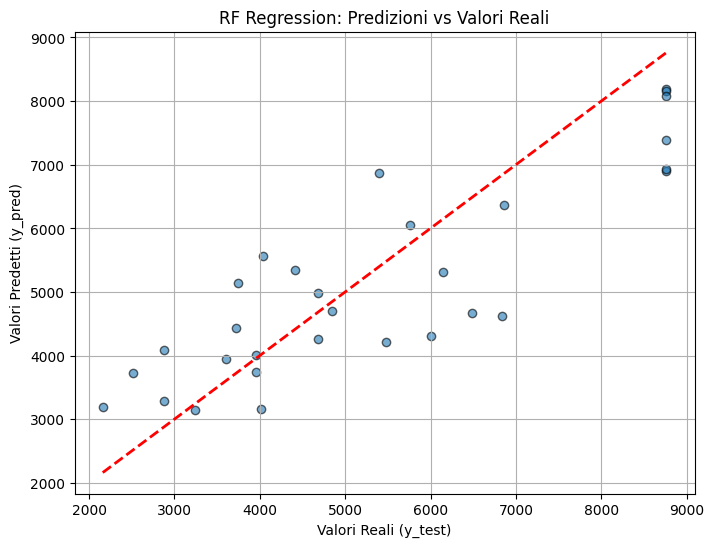

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("*** Random Forest ***")
clf = RandomForestRegressor(n_estimators=600, max_depth=10,\
                            min_samples_split=5,\
                            random_state=42,\
                            n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred)/24))
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("RF Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** XGBoost Regression ***
MAE = 38.873748779296875
MAPE = 0.2131544053554535
MSE = 55458.182291666664
R2 = 0.691472053527832


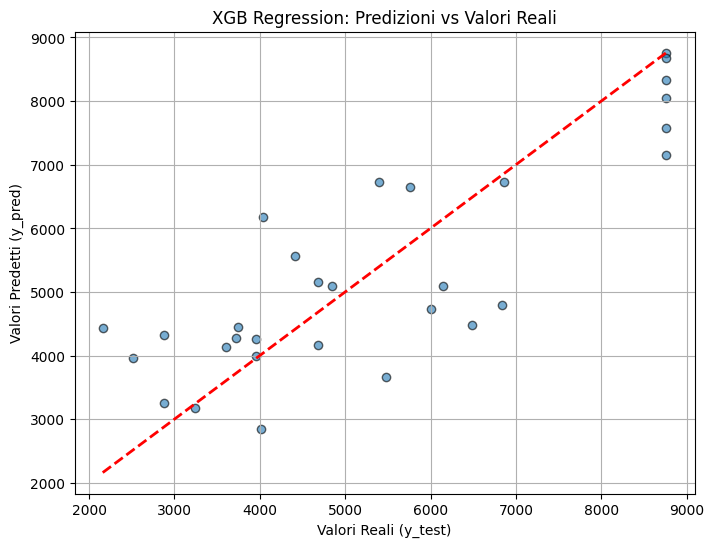

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("*** XGBoost Regression ***")
clf = xgb.XGBRegressor(objective="reg:squarederror",\
                       n_estimators=500,
                       learning_rate=0.1,
                       random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("XGB Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** Linear Regression ***
MAE = 54.69101263682048
MAPE = 0.2822320123258025
MSE = 104426.23394818579
R2 = 0.3993836176098844


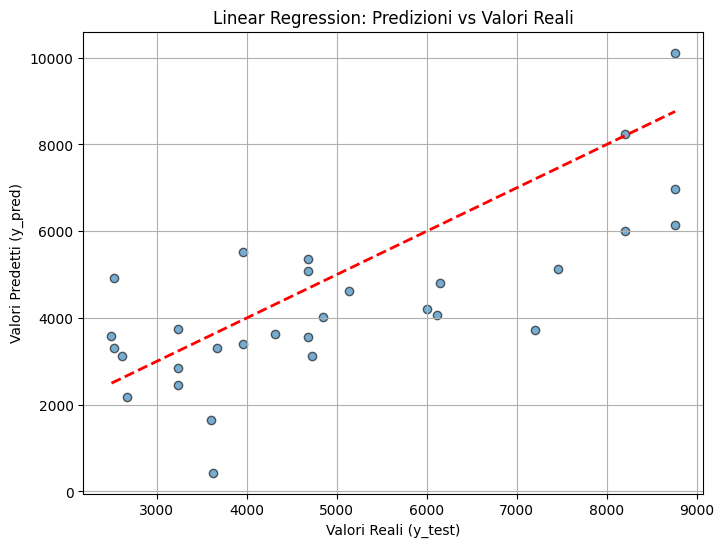

In [18]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")


clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 5
MAE: 51.0294
MAPE: 25.3088%
MSE: 94751.0639
R2: 0.4729


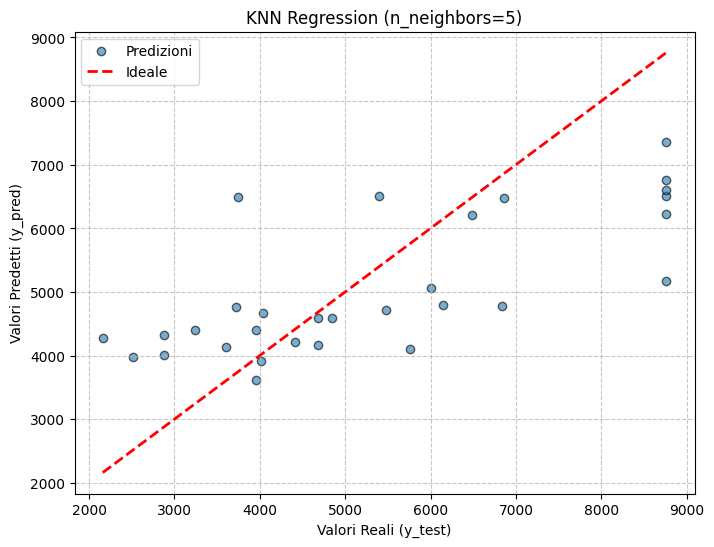

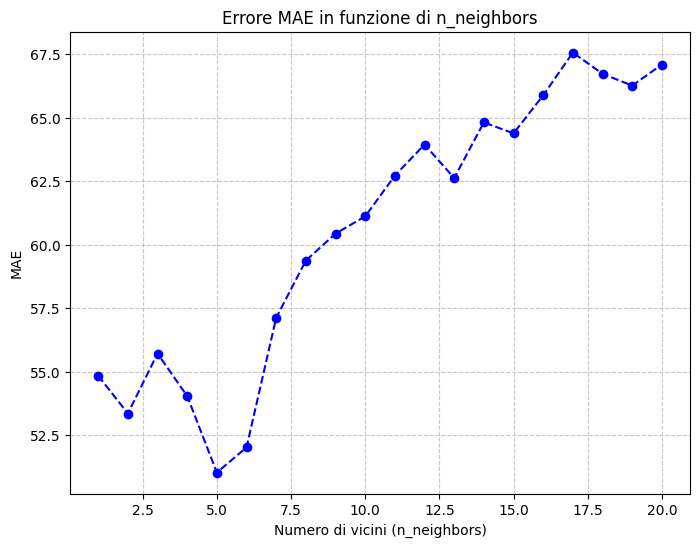

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = (mean_squared_error(y_test, y_pred)) /24
r2 = r2_score(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Modelli - Comp3

In [20]:
tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_3 = tabella_tot

<ipython-input-21-d0d86c0419bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


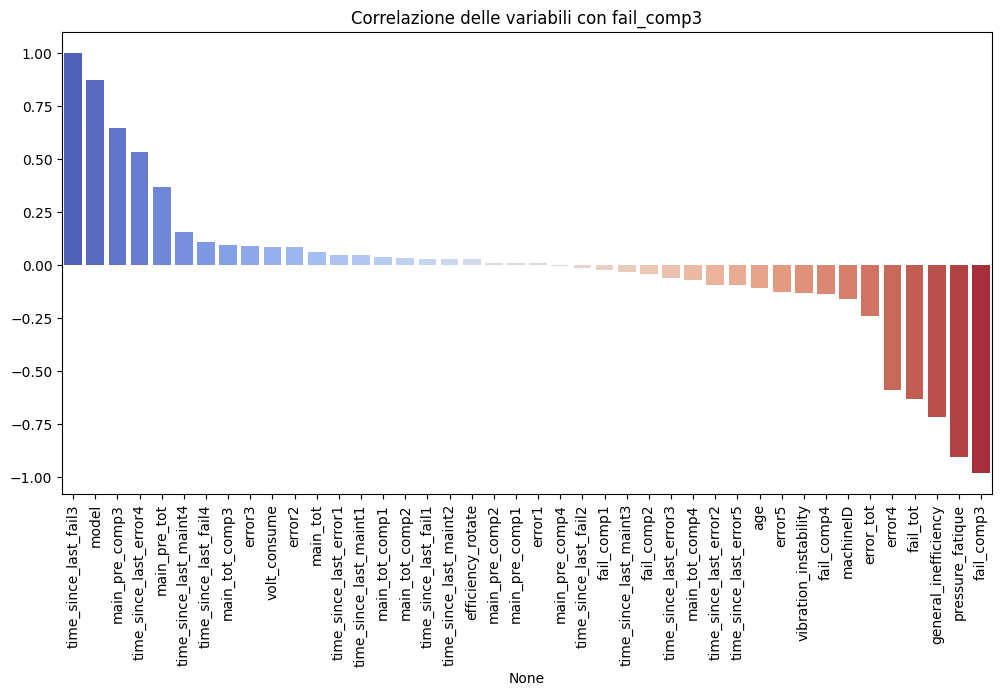

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [21]:
# Correlazione con la variabile target
target_corr = tabella_tot_3.corr()["time_since_last_fail3"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp3")
plt.show()
print(tabella_tot.columns)

In [22]:
tabella_tot_3 = tabella_tot_3[['volt_consume','general_inefficiency',\
                               'pressure_fatique', 'vibration_instability','efficiency_rotate','fail_comp3',\
                               'error4','fail_tot','age', 'model','main_pre_comp3',\
                               'main_pre_tot','time_since_last_fail3','error_tot']]
tabella_tot_3["fail2_efficiency"] = tabella_tot_3["fail_comp3"]/tabella_tot_3["pressure_fatique"]
tabella_tot_3["volt_efficiency"] = tabella_tot_3["volt_consume"]/tabella_tot_3["pressure_fatique"]
tabella_tot_3["error3_fail2"] = tabella_tot_3["error4"]/tabella_tot_3["fail_comp3"]
tabella_tot_3["main_pre_fai2"] = tabella_tot_3["main_pre_comp3"]/tabella_tot_3["fail_comp3"] + 0.000001
tabella_tot_3["error3_fail2"] = tabella_tot_3["error4"]/tabella_tot_3["fail_comp3"]
tabella_tot_3["high_vibration"] = (tabella_tot_3["general_inefficiency"] > tabella_tot_3["general_inefficiency"].median()).astype(int)
tabella_tot_3["volt_time_fail2"] = tabella_tot_3["volt_consume"]*tabella_tot_3["fail_comp3"]
tabella_tot_3["efficency_time_fail1"] = tabella_tot_3["pressure_fatique"]*tabella_tot_3["fail_comp3"]
tabella_tot_3["fail_tot_per_inefficiency"] = tabella_tot_3["fail_tot"] / (tabella_tot_3["pressure_fatique"] + 1)
tabella_tot_3["fail_tot_per_volt"] = tabella_tot_3["fail_tot"] / (tabella_tot_3["volt_consume"] + 1)
tabella_tot_3["error3_x_main_pre_comp2"] = tabella_tot_3["error4"] * tabella_tot_3["main_pre_comp3"]
tabella_tot_3["volt_x_efficiency"] = tabella_tot_3["volt_consume"] * tabella_tot_3["pressure_fatique"]

# Trasformazioni logaritmiche (evitando log(0) con log1p)
tabella_tot_3["log_fail_tot"] = np.log1p(tabella_tot_3["fail_tot"])
tabella_tot_3["log_efficiency"] = np.log1p(tabella_tot_3["pressure_fatique"])
tabella_tot_3["model_x_fail_tot"] = tabella_tot_3["model"] * tabella_tot_3["fail_tot"]
tabella_tot_3["model_x_volt"] = tabella_tot_3["model"] * tabella_tot_3["volt_consume"]
tabella_tot_3["model_x_age"] = tabella_tot_3["model"] * tabella_tot_3["age"]

# Mostra le prime righe per verifica
print(tabella_tot_3.head())

tabella_tot_3.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_3.fillna(0, inplace=True)
tabella_tot_3.head()


   volt_consume  general_inefficiency  pressure_fatique  \
0      0.669609              0.602641          0.541367   
1      0.669322              0.601702          0.540677   
2      0.668925              0.602060          0.541285   
3      0.668927              0.601642          0.540838   
4      0.670435              0.603195          0.543507   

   vibration_instability  efficiency_rotate  fail_comp3  error4  fail_tot  \
0               0.528529           0.642191           0       5         7   
1               0.524821           0.642267           0       5         4   
2               0.527084           0.642546           0       8         5   
3               0.525343           0.641785           0       2         6   
4               0.524343           0.642943           0       6         7   

   age  model  ...  efficency_time_fail1  fail_tot_per_inefficiency  \
0   18      3  ...                   0.0                   4.541423   
1    7      4  ...                   0.0

<ipython-input-22-7f7b1c24b746>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_tot_3["fail2_efficiency"] = tabella_tot_3["fail_comp3"]/tabella_tot_3["pressure_fatique"]
<ipython-input-22-7f7b1c24b746>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_tot_3["volt_efficiency"] = tabella_tot_3["volt_consume"]/tabella_tot_3["pressure_fatique"]
<ipython-input-22-7f7b1c24b746>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,volt_consume,general_inefficiency,pressure_fatique,vibration_instability,efficiency_rotate,fail_comp3,error4,fail_tot,age,model,...,efficency_time_fail1,fail_tot_per_inefficiency,fail_tot_per_volt,error3_x_main_pre_comp2,volt_x_efficiency,log_fail_tot,log_efficiency,model_x_fail_tot,model_x_volt,model_x_age
0,0.669609,0.602641,0.541367,0.528529,0.642191,0,5,7,18,3,...,0.0,4.541423,4.192597,35,0.362505,2.079442,0.432670,21,2.008828,54
1,0.669322,0.601702,0.540677,0.524821,0.642267,0,5,4,7,4,...,0.0,2.596262,2.396183,25,0.361887,1.609438,0.432222,16,2.677286,28
2,0.668925,0.602060,0.541285,0.527084,0.642546,0,8,5,8,3,...,0.0,3.244045,2.995941,48,0.362079,1.791759,0.432617,15,2.006774,24
3,0.668927,0.601642,0.540838,0.525343,0.641785,0,2,6,7,3,...,0.0,3.893985,3.595125,14,0.361781,1.945910,0.432326,18,2.006780,21
4,0.670435,0.603195,0.543507,0.524343,0.642943,0,6,7,2,3,...,0.0,4.535127,4.190526,48,0.364386,2.079442,0.434057,21,2.011304,6


In [23]:
X = tabella_tot_3.drop('time_since_last_fail3',axis='columns')
y = tabella_tot_3['time_since_last_fail3']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


*** Random Forest ***
MAE = 13.202734110616747
MAPE = 0.10062082880346622
MSE = 13303.338227032822
R2 = 0.9589550962440498


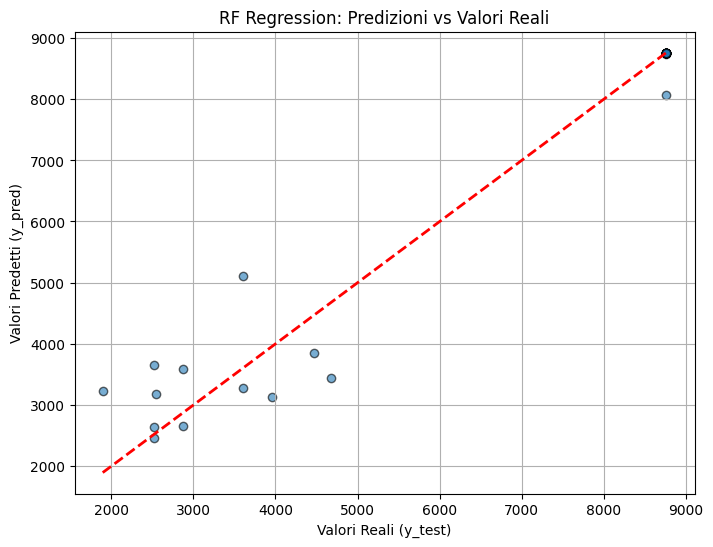

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("*** Random Forest ***")
clf = RandomForestRegressor(n_estimators=600, max_depth=10,\
                            min_samples_split=5,\
                            random_state=42,\
                            n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("RF Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** XGBoost Regression ***
MAE = 15.98703384399414
MAPE = 0.13615794479846954
MSE = 24310.627604166668
R2 = 0.9249942302703857


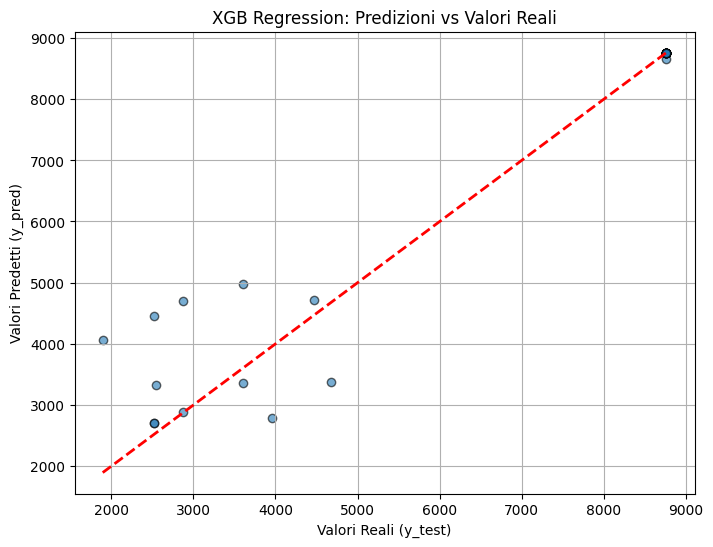

In [26]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("*** XGBoost Regression ***")
clf = xgb.XGBRegressor(objective="reg:squarederror",\
                       n_estimators=500,
                       learning_rate=0.1,
                       random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("XGB Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** Linear Regression ***
MAE = 21.363561018308005
MAPE = 0.15147758871105574
MSE = 22252.5472792355
R2 = 0.9313440246490173


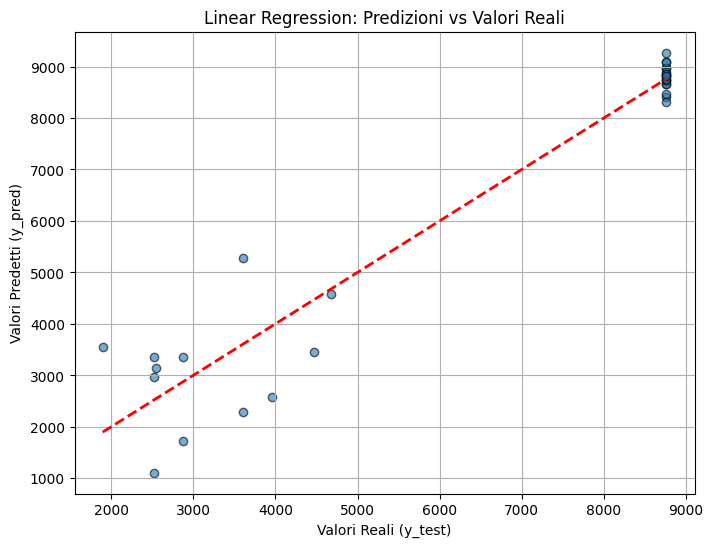

In [27]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 2
MAE: 20.4507
MAPE: 14.8021%
MSE: 48670.6427
R2: 0.8498


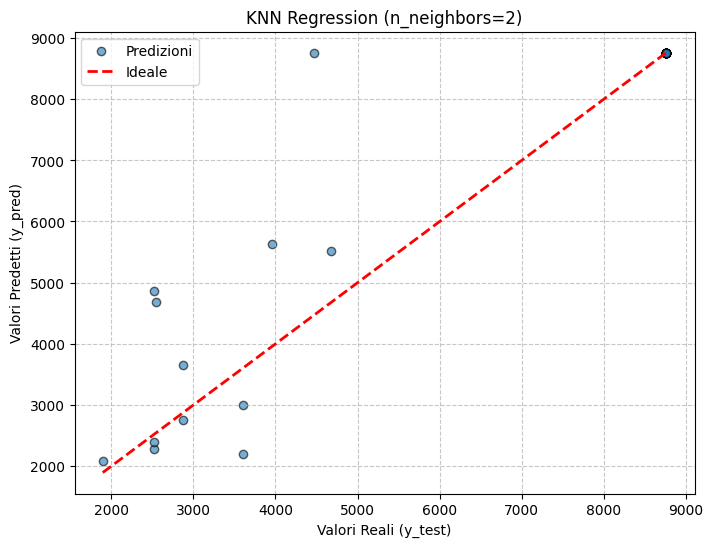

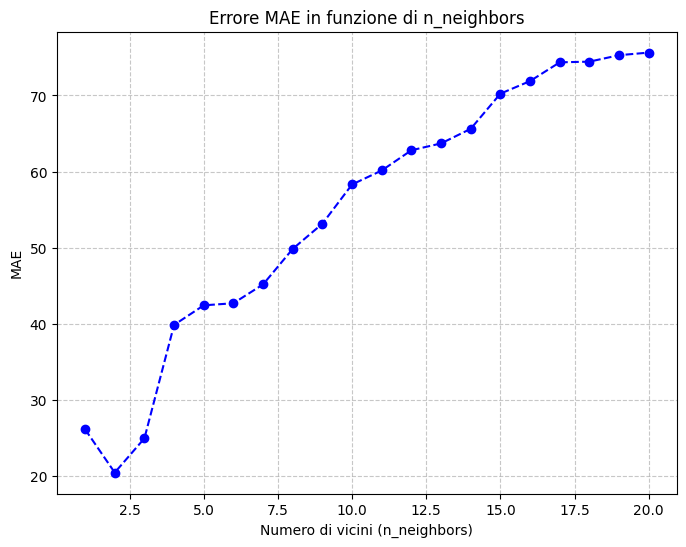

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = (mean_squared_error(y_test, y_pred)) /24
r2 = r2_score(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Modelli - Comp4

In [30]:
tabella_tot = pd.read_csv('/content/drive/MyDrive/Tesina - DM/Paralleli/tabella_tot.csv')
tabella_tot_4 = tabella_tot

<ipython-input-31-5440874adc27>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")


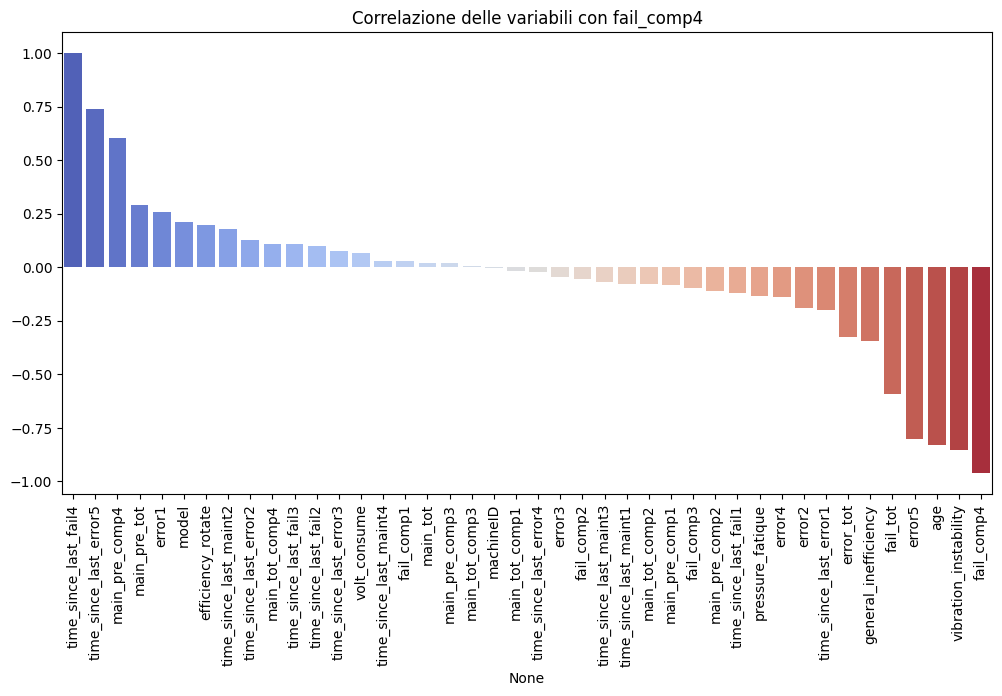

Index(['machineID', 'error1', 'error2', 'error3', 'error4', 'error5',
       'error_tot', 'fail_comp1', 'fail_comp2', 'fail_comp3', 'fail_comp4',
       'fail_tot', 'main_tot_comp1', 'main_tot_comp2', 'main_tot_comp3',
       'main_tot_comp4', 'main_tot', 'main_pre_comp1', 'main_pre_comp2',
       'main_pre_comp3', 'main_pre_comp4', 'main_pre_tot', 'age', 'model',
       'time_since_last_fail1', 'time_since_last_fail2',
       'time_since_last_fail3', 'time_since_last_fail4',
       'time_since_last_maint1', 'time_since_last_maint2',
       'time_since_last_maint3', 'time_since_last_maint4',
       'time_since_last_error1', 'time_since_last_error2',
       'time_since_last_error3', 'time_since_last_error4',
       'time_since_last_error5', 'efficiency_rotate', 'volt_consume',
       'general_inefficiency', 'pressure_fatique', 'vibration_instability'],
      dtype='object')


In [31]:
# Correlazione con la variabile target
target_corr = tabella_tot_4.corr()["time_since_last_fail4"].sort_values(ascending=False)

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlazione delle variabili con fail_comp4")
plt.show()
print(tabella_tot_4.columns)

In [40]:
tabella_tot_4 = tabella_tot_4[['volt_consume','general_inefficiency',\
                               'vibration_instability', 'pressure_fatique','efficiency_rotate','fail_comp4',\
                               'error5','fail_tot','age', 'model','main_pre_comp4',\
                               'main_pre_tot','time_since_last_fail4','error_tot']]
tabella_tot_4["fail2_efficiency"] = tabella_tot_4["fail_comp4"]/tabella_tot_4["vibration_instability"]
tabella_tot_4["volt_efficiency"] = tabella_tot_4["volt_consume"]/tabella_tot_4["vibration_instability"]
tabella_tot_4["error5_fail4"] = tabella_tot_4["error5"]/tabella_tot_4["fail_comp4"]
tabella_tot_4["main_pre_fail4"] = tabella_tot_4["main_pre_comp4"]/tabella_tot_4["fail_comp4"] + 0.000001
tabella_tot_4["error5_fail4"] = tabella_tot_4["error5"]/tabella_tot_4["fail_comp4"]
tabella_tot_4["high_vibration"] = (tabella_tot_4["general_inefficiency"] > tabella_tot_4["general_inefficiency"].median()).astype(int)
tabella_tot_4["volt_time_fail4"] = tabella_tot_4["volt_consume"]*tabella_tot_4["fail_comp4"]
tabella_tot_4["efficency_time_fail4"] = tabella_tot_4["vibration_instability"]*tabella_tot_4["fail_comp4"]
tabella_tot_4["fail_tot_per_inefficiency"] = tabella_tot_4["fail_tot"] / (tabella_tot_4["vibration_instability"] + 1)
tabella_tot_4["fail_tot_per_volt"] = tabella_tot_4["fail_tot"] / (tabella_tot_4["volt_consume"] + 1)
tabella_tot_4["error3_x_main_pre_comp4"] = tabella_tot_4["error5"] * tabella_tot_4["main_pre_comp4"]
tabella_tot_4["volt_x_efficiency"] = tabella_tot_4["volt_consume"] * tabella_tot_4["vibration_instability"]

# Trasformazioni logaritmiche (evitando log(0) con log1p)
tabella_tot_4["log_fail_tot"] = np.log1p(tabella_tot_4["fail_tot"])
tabella_tot_4["log_efficiency"] = np.log1p(tabella_tot_4["vibration_instability"])
tabella_tot_4["model_x_fail_tot"] = tabella_tot_4["model"] * tabella_tot_4["fail_tot"]
tabella_tot_4["model_x_volt"] = tabella_tot_4["model"] * tabella_tot_4["volt_consume"]
tabella_tot_4["model_x_age"] = tabella_tot_4["model"] * tabella_tot_4["age"]

# Mostra le prime righe per verifica
print(tabella_tot_4.head())

tabella_tot_4.replace([np.inf, -np.inf], 0, inplace=True)
tabella_tot_4.fillna(0, inplace=True)



   volt_consume  general_inefficiency  vibration_instability  \
0      0.669609              0.602641               0.528529   
1      0.669322              0.601702               0.524821   
2      0.668925              0.602060               0.527084   
3      0.668927              0.601642               0.525343   
4      0.670435              0.603195               0.524343   

   pressure_fatique  efficiency_rotate  fail_comp4  error5  fail_tot  age  \
0          0.541367           0.642191           4       4         7   18   
1          0.540677           0.642267           0       3         4    7   
2          0.541285           0.642546           0       2         5    8   
3          0.540838           0.641785           0       0         6    7   
4          0.543507           0.642943           0       3         7    2   

   model  ...  efficency_time_fail4  fail_tot_per_inefficiency  \
0      3  ...              2.114116                   4.579566   
1      4  ...       

<ipython-input-40-4a9e76443554>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_tot_4["fail2_efficiency"] = tabella_tot_4["fail_comp4"]/tabella_tot_4["vibration_instability"]
<ipython-input-40-4a9e76443554>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_tot_4["volt_efficiency"] = tabella_tot_4["volt_consume"]/tabella_tot_4["vibration_instability"]
<ipython-input-40-4a9e76443554>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [41]:
X = tabella_tot_4.drop('time_since_last_fail4',axis='columns')
y = tabella_tot_4['time_since_last_fail4']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


*** Random Forest ***
MAE = 17.18686041825327
MAPE = 0.13661605090287132
MSE = 19528.97338475035
R2 = 0.9424748280485173


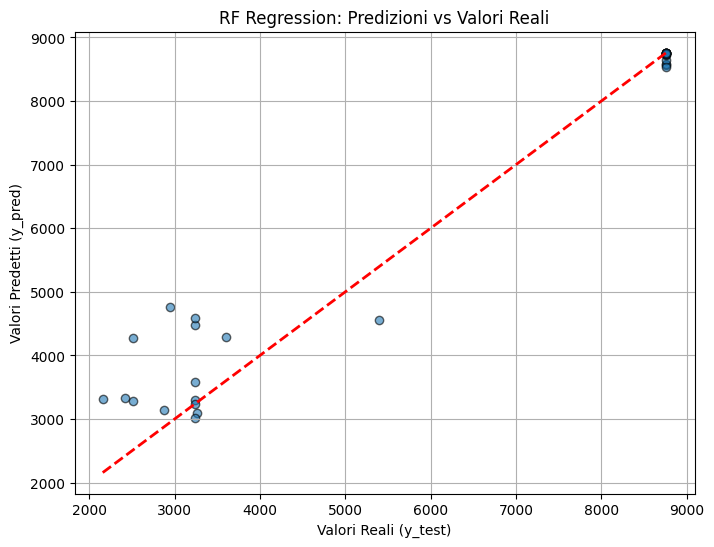

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("*** Random Forest ***")
clf = RandomForestRegressor(n_estimators=600, max_depth=10,\
                            min_samples_split=5,\
                            random_state=42,\
                            n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("RF Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** XGBoost Regression ***
MAE = 20.984471638997395
MAPE = 0.17647694051265717
MSE = 31675.294270833332
R2 = 0.9066962003707886


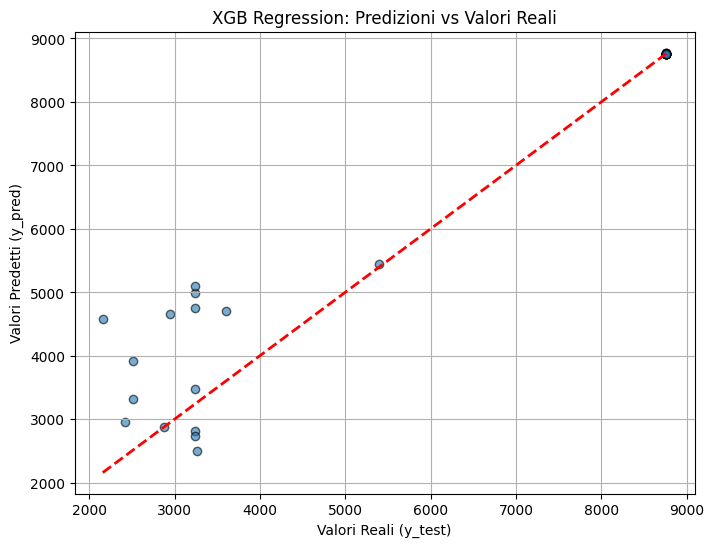

In [44]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("*** XGBoost Regression ***")
clf = xgb.XGBRegressor(objective="reg:squarederror",\
                       n_estimators=500,
                       learning_rate=0.1,
                       random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =', mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("XGB Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()


*** Linear Regression ***
MAE = 25.522776307000054
MAPE = 0.14651388840077992
MSE = 33112.61414900589
R2 = 0.8918016744878199


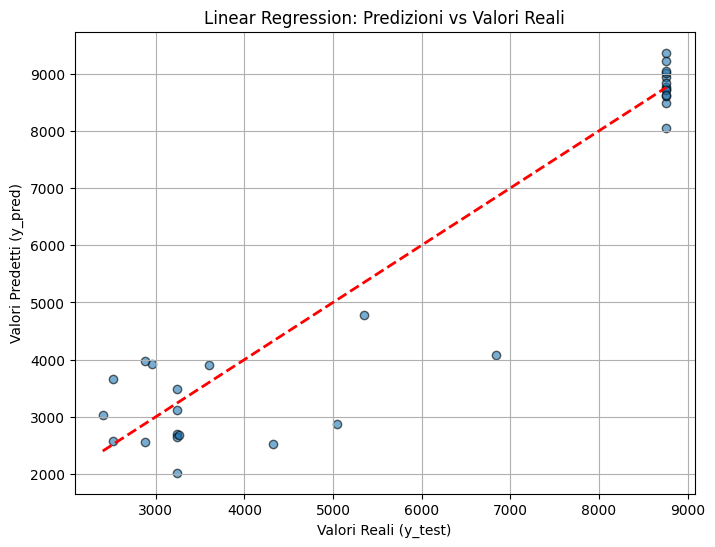

In [37]:
import matplotlib.pyplot as plt
print("*** Linear Regression ***")

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('MAE =', (mean_absolute_error(y_test, y_pred))/24)
print('MAPE =',mean_absolute_percentage_error(y_test, y_pred))
print('MSE =',(mean_squared_error(y_test, y_pred))/24)
print('R2 =',r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title("Linear Regression: Predizioni vs Valori Reali")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2)  # Linea diagonale ideale
plt.grid(True)
plt.show()

Numero ottimale di vicini: 1
MAE: 28.6306
MAPE: 17.4227%
MSE: 82245.6056
R2: 0.7313


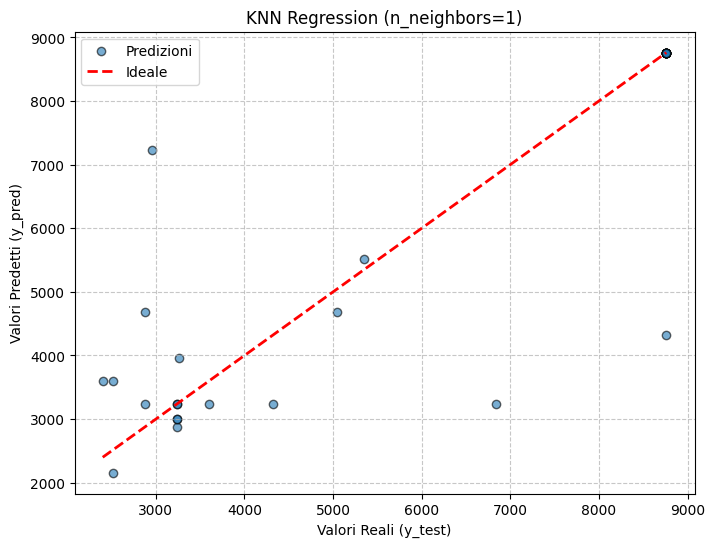

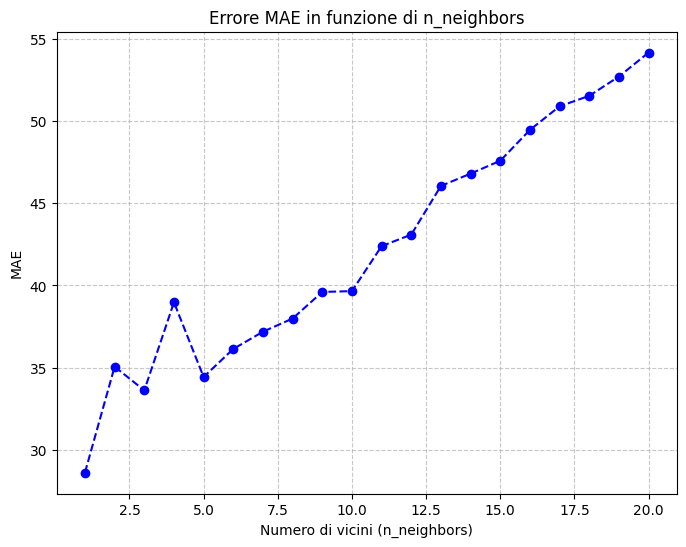

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# Definizione del range di n_neighbors da testare
n_neighbors_range = range(1, 21)
errors = []

for n_neighbors in n_neighbors_range:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) / 24
    errors.append(mae)

# Trova il miglior numero di vicini
best_n = n_neighbors_range[np.argmin(errors)]
print(f"Numero ottimale di vicini: {best_n}")

# Addestramento del modello con il miglior n_neighbors
knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcolo metriche di errore
mae = mean_absolute_error(y_test, y_pred) / 24
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = (mean_squared_error(y_test, y_pred)) /24
r2 = r2_score(y_test, y_pred)

# Stampa risultati in formato chiaro
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

# Visualizzazione dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="k", label="Predizioni")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", linewidth=2, label="Ideale")  # Linea diagonale ideale
plt.xlabel("Valori Reali (y_test)")
plt.ylabel("Valori Predetti (y_pred)")
plt.title(f"KNN Regression (n_neighbors={best_n})")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Visualizzazione dell'errore in funzione di n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_range, errors, marker='o', linestyle='dashed', color='b')
plt.xlabel("Numero di vicini (n_neighbors)")
plt.ylabel("MAE")
plt.title("Errore MAE in funzione di n_neighbors")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#Possibili Migliorie e Affinamenti:
1) Avere più informazioni sulle macchine aiuterebbe a individuare le caratteristiche più importanti ed a misurarle ed analizzarle correttamente, come: più info sull'output delle macchine o sul costo della manutenzione.

2) Analisi sulla curva di efficienza - Tempi tra eventi.